# Detection of Phishing Websites Using Machine Learning

Trying to gather personal information through deceptive emails and websites is called phishing.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

# Loading the data

The dataset is loaded using read_csv method from pandas.

In [ ]:
# Reading the dataset
data = pd.read_csv("Dataset/data.csv")

# Convert data

To improve training efficiency and speed, float64 and int64 values are converted to their 32 bit counterpart.

The dataset has 50 features including label and id with 10000 rows.

In [ ]:
# Converting data types for better performance
float_columns = data.select_dtypes('float64').columns
for c in float_columns:
    data[c] = data[c].astype('float32')

int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [ ]:
# Renaming the 'CLASS_LABEL' column to 'labels' for better understanding
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

# View the data

To see 5 random rows of the dataset.

In [ ]:
# Sampling the data
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
1377,1378,3,1,3,67,0,0,0,0,0,0,0,0,0,8,1,1,0,0,0,0,31,29,0,0,0,0,0.000000,0.000000,0,1,1,0,0,1.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,-1,1
2538,2539,2,0,5,69,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,17,45,0,0,0,0,0.044444,1.000000,1,1,0,0,0,0.955556,0,0,0,0,0,0,0,0,1,0,-1,1,-1,-1,1
6102,6103,3,1,4,84,0,0,0,0,4,0,0,0,0,6,1,1,0,0,1,0,22,55,0,0,0,0,0.035294,0.035971,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,-1,1,1,0,1,0
9292,9293,2,1,1,29,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,0,16,6,0,0,0,0,0.166667,0.363636,0,1,1,0,0,0.072917,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
8165,8166,1,0,5,72,7,0,0,0,0,0,0,0,0,9,1,1,0,0,0,0,13,52,0,0,0,0,0.029851,0.889706,0,1,0,1,0,0.002985,0,0,0,0,1,1,0,0,1,0,-1,0,0,1,0


# Summary Statistics

It is fairly straightforward that using the describe method it is seen that some of the columns have high variance and some small variance, because some of those columns have big values and big ranges.

In [ ]:
# Summary Statistics
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342363,0.387295,0.373173,0.362873,0.432281,0.3024,0.232997,0.312426,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

# Balance/Imbalanced Data

The labels are balanced i.e the data is balanced for non phishing and phishing label

<Axes: xlabel='labels'>

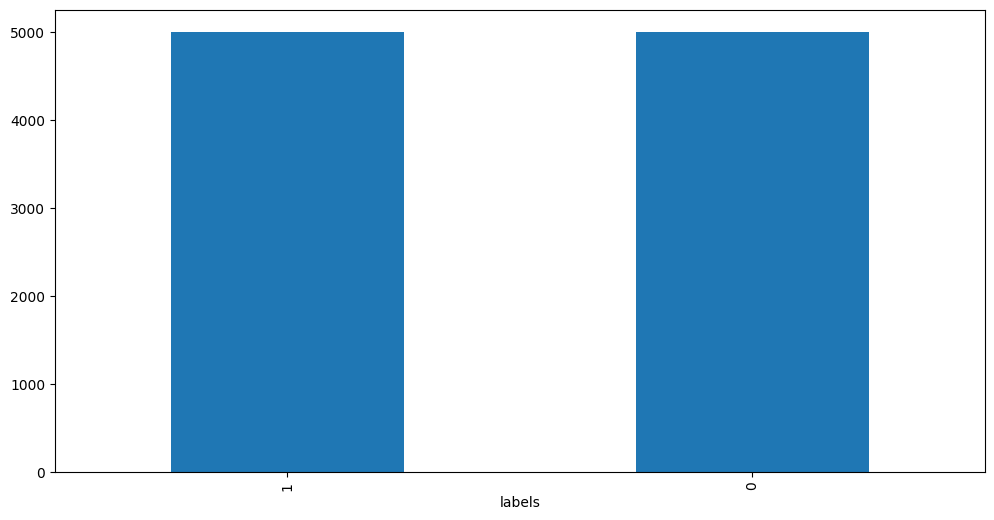

In [ ]:
# Counting the labels to understand the distribution (Phishing vs Legitimate)
data['labels'].value_counts().plot(kind='bar')

# Spearman Correlation

The spearman correlation allows us to find out what features are correlated in predicting if a site is phishing or is not.

In [ ]:
# Function to create a Correlation Heatmap
def correlation_heatmap(data, start, end):
    y = data['labels']
    temp = data.iloc[:, start:end]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

# First 10 columns

Looking at the first 10 columns vs labels suggests that none of the features have a strong correlation with the labels. However, it is seen that NumDash has a negative correlation (–0.37) with the labels feature, suggesting that URLs with more dashes are less likely to be associated with malicious URLs.

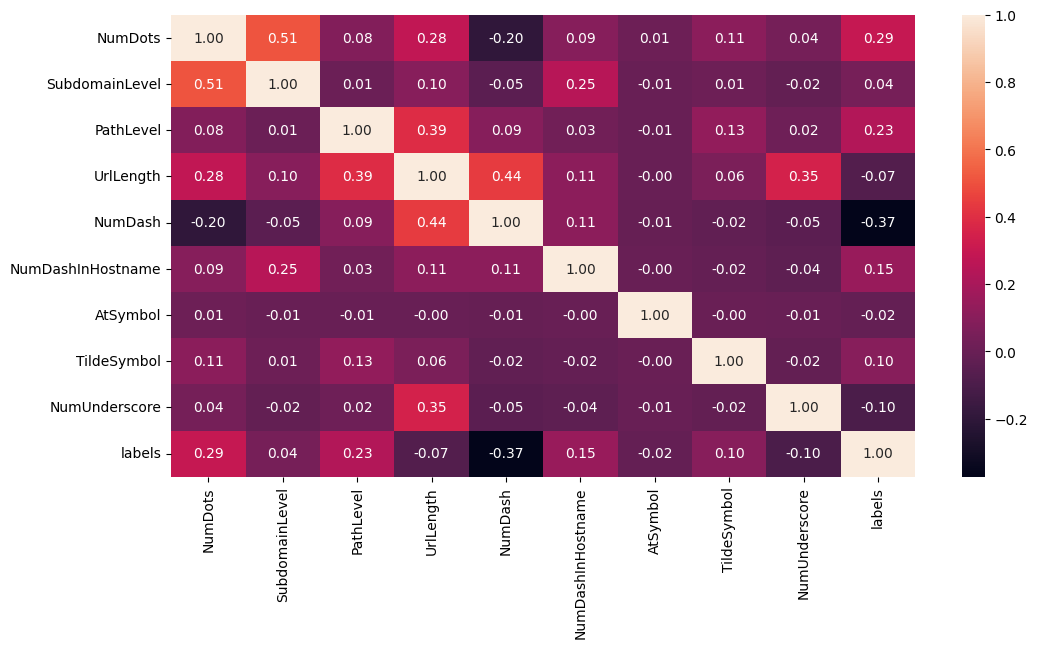

In [ ]:
correlation_heatmap(data, 0, 10)

# Columns 10 to 20

No strong, or even medium, strength correlation features with labels.

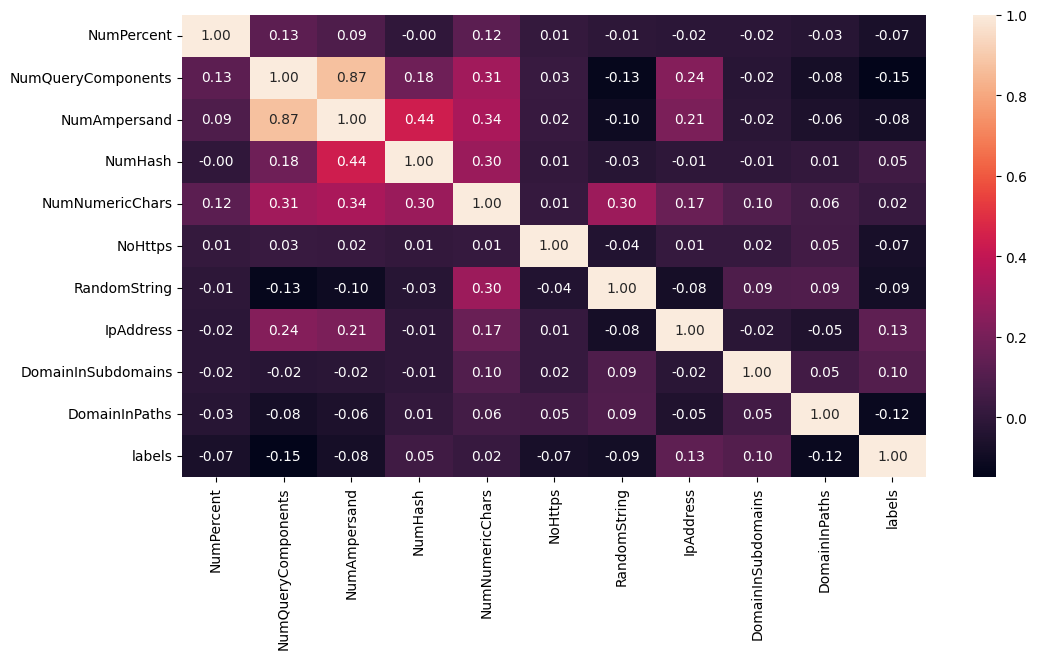

In [ ]:
correlation_heatmap(data, 10, 20)

# Columns 20 to 30

Unfortunately, there is still no strong correlation feature with labels

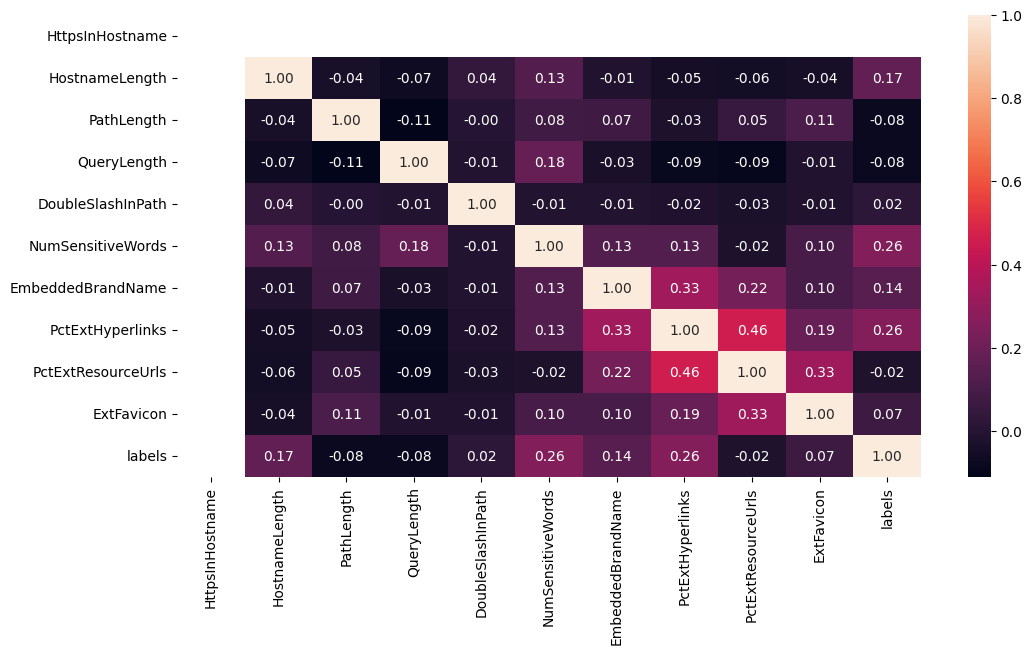

In [ ]:
correlation_heatmap(data, 20, 30)

# Columns 30 to 40

It is seen there are a few features that are linearly correlated to the target variable 'labels'.

* InsecureForms: Labels have a moderate positive correlation (0.32) to this feature, meaning that certain insecure forms (such as forms that are not using HTTPS) are a significant phishing indicator.
* PctNullSelfRedirectHyperlinks: It has mild positive correlation (0.34) with labels which intimates that a large percentage of null/self redirects can be an indication of phishing URLs.
* FrequentDomainNameMismatch: URLs with frequent mismatches in domains exhibit a positive correlation (0.46) with labels, indicating that phishing is strongly associated with URLs which have mismatches.
* SubmitInfoToEmail: There is a significant negative correlation (-0.36) to labels meaning that phishing URLs are less likely to use this feature (e.g., submitting data directly to email).

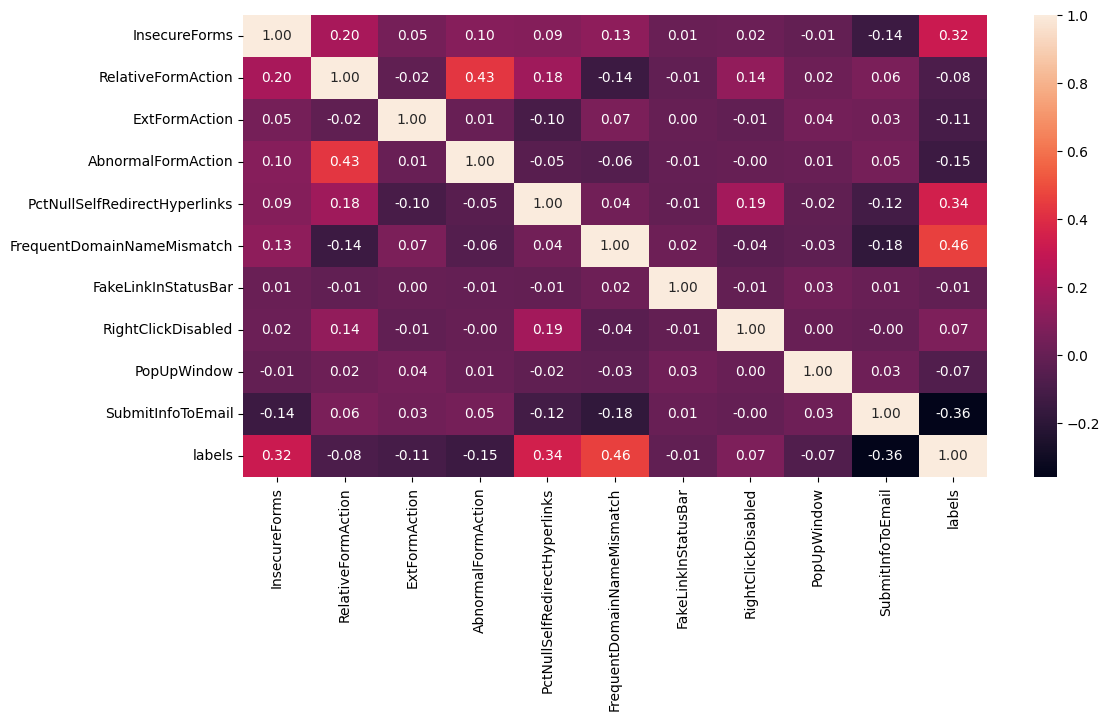

In [ ]:
correlation_heatmap(data, 30, 40)

# Columsn 40 to 50

PctExtNullSelfRedirectHyperlinksRT: We find this feature to have a strong negative correlation (-0.54) with labels, meaning higher values in this feature are more strongly correlated with legitimate URLs than phishing URLs.

IframeOrFrame: This feature has a moderate negative correlation (-0.24) with labels, so iframe or frame usage URLs are more likely filtered out or associated with more legitimate URLs.

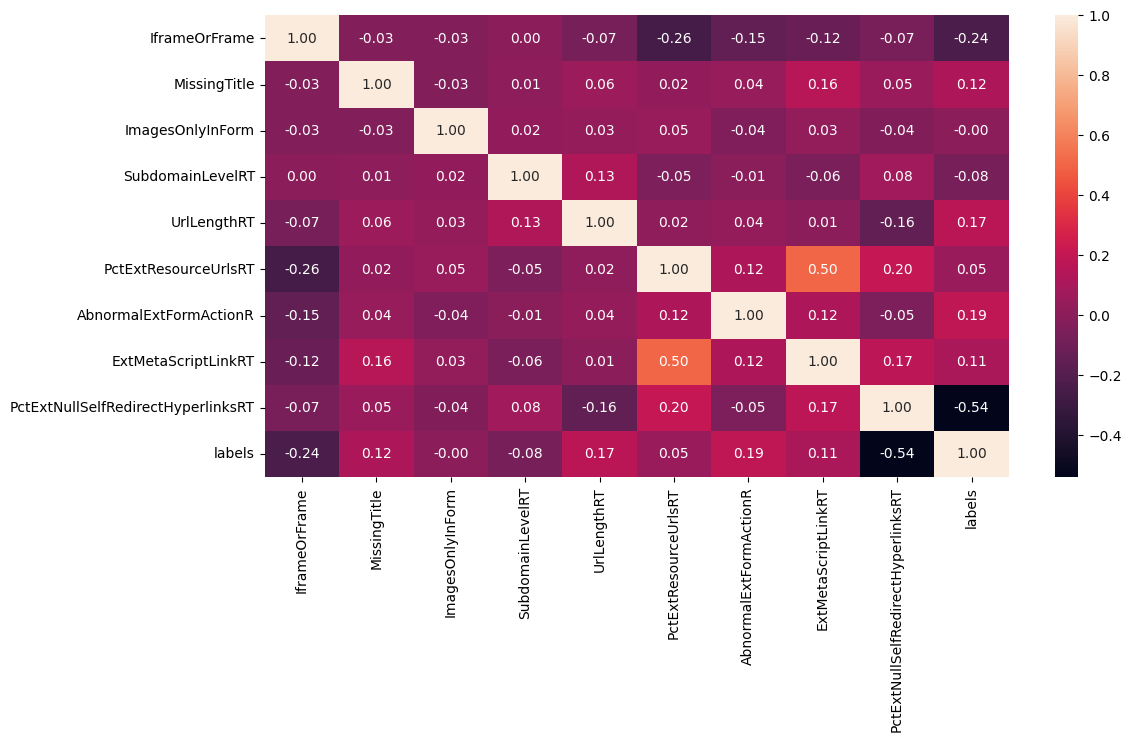

In [ ]:
correlation_heatmap(data, 40, 50)

# Mutual Info

Linear correlation between features and labels is found with a mutual info classifier.

In [ ]:
from sklearn.feature_selection import mutual_info_classif as mutual_info_classifier

In [ ]:
# Splitting the data into features and labels
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [ ]:
# Finding the number of discrete features by filtering integer features
discrete_features = X.dtypes == int

The scores are processed from mutual info classifier and the output is different compared to spearman correlation.

In [ ]:
mutualinfo_scores = mutual_info_classifier(X, y, discrete_features=discrete_features)
mutualinfo_scores = pd.Series(mutualinfo_scores, name='MI Scores', index=X.columns)
mutualinfo_scores = mutualinfo_scores.sort_values(ascending=False)
mutualinfo_scores

,MI Scores
PctExtHyperlinks,0.463621
PctExtResourceUrls,0.293334
PctNullSelfRedirectHyperlinks,0.230768
PctExtNullSelfRedirectHyperlinksRT,0.212897
NumNumericChars,0.132227
ExtMetaScriptLinkRT,0.125154
FrequentDomainNameMismatch,0.125126
NumDash,0.110871
NumDots,0.074648
SubmitInfoToEmail,0.073040


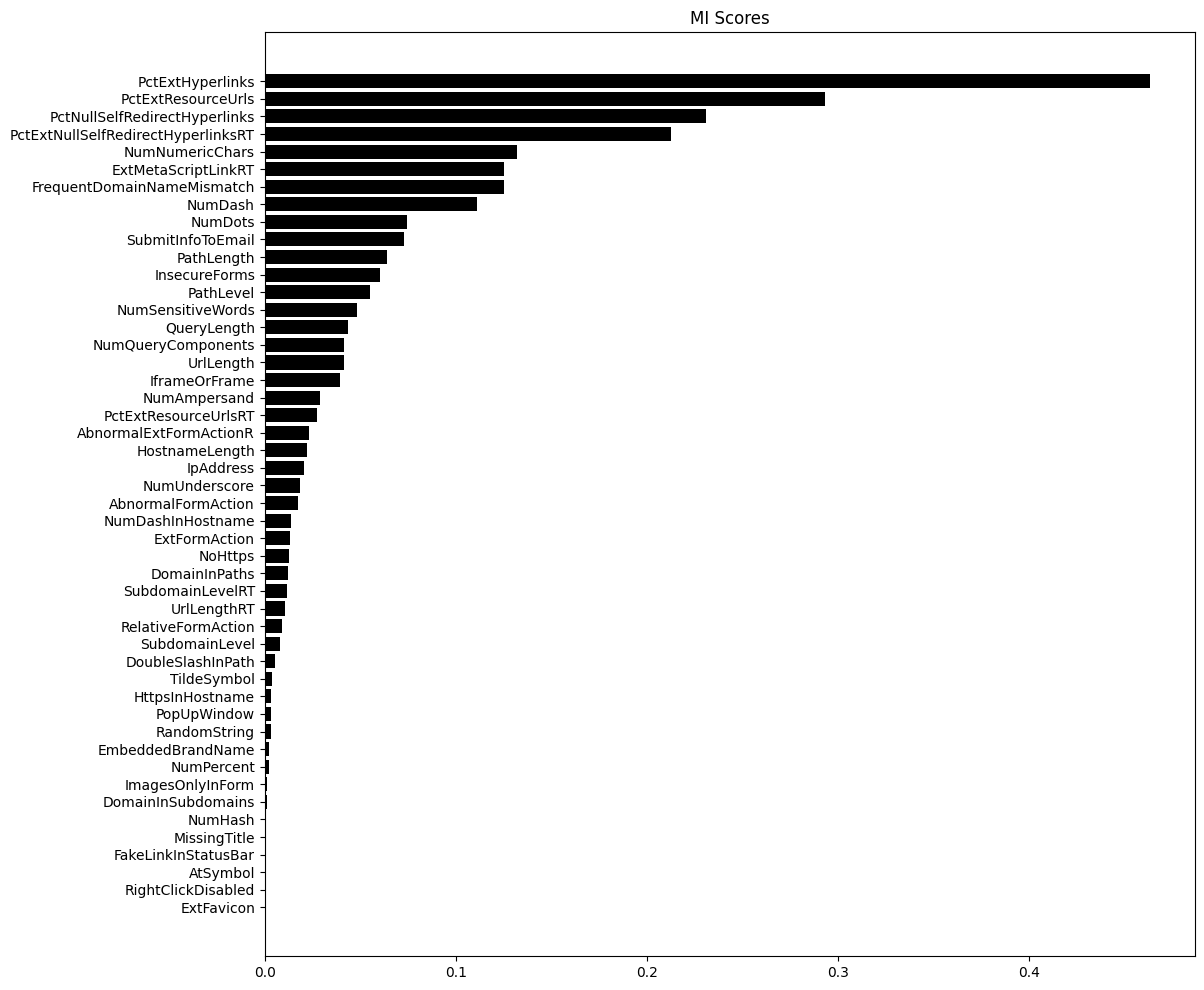

In [ ]:
def plot_mutualinfo_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='black')
    plt.title("MI Scores")
    plt.yticks(width, ticks)

plt.figure(dpi=100, figsize=(12,12))
plot_mutualinfo_scores(mutualinfo_scores)

# Prediction

Here, Logistic Regression is used as a baseline, which is then compared to Random Forest Classifer to achieve a higher score.

The evaluation metrics will be accuracy, precision, recall and f1 score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from cuml.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train logistic models

It is to perform a continuous training process using logistic regression model to find how many features would be required to find the best fitted model without changing the hyper parameters and hence the idea is the data centric training. The method returns number of top N features from the features that scored the highest MI score to be used for training the model and returns back all the evaluation metrices.

In [ ]:
def train_logistic_regression(data, top_n):
    top_n_features = mutualinfo_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    # 20% for testing and 80% for training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    logisticregression = LogisticRegression(max_iter=10000)
    logisticregression.fit(X_train, y_train)

    y_pred = logisticregression.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

The loop is run while considering from 20 up to 50 number of features at each iteration. In the number of features, each iteration is considered, and highest scores are chosen.

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic_regression(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9149338374291115, recall : 0.9370764762826719, f1 score : 0.9258727881396461, accuracy : 0.9225
Performance for Logistic Model with Top 21 features is precision : 0.898238747553816, recall : 0.9357798165137615, f1 score : 0.9166250624063904, accuracy : 0.9165
Performance for Logistic Model with Top 22 features is precision : 0.9366471734892787, recall : 0.9348249027237354, f1 score : 0.9357351509250244, accuracy : 0.934
Performance for Logistic Model with Top 23 features is precision : 0.9201154956689124, recall : 0.9381746810598626, f1 score : 0.9290573372206026, accuracy : 0.927
Performance for Logistic Model with Top 24 features is precision : 0.9237536656891495, recall : 0.9337944664031621, f1 score : 0.9287469287469288, accuracy : 0.9275
Performance for Logistic Model with Top 25 features is precision : 0.9201923076923076, recall : 0.9400785854616895, f1 score : 0.9300291545189504, accuracy : 0.928
Performance fo

In [ ]:
dataframe = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
dataframe.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.914934,0.937076,0.925873,0.9225
1,21,0.898239,0.935780,0.916625,0.9165
2,22,0.936647,0.934825,0.935735,0.9340
3,23,0.920115,0.938175,0.929057,0.9270
4,24,0.923754,0.933794,0.928747,0.9275


In [ ]:
# Sort by descending order of accuracy
df = dataframe.sort_values(by='accuracy', ascending=False)
df.head()

,num_of_features,precision,recall,f1_score,accuracy
15,35,0.933860,0.959432,0.946473,0.9465
19,39,0.937804,0.951677,0.944689,0.9435
25,45,0.932323,0.951546,0.941837,0.9430
29,49,0.935140,0.951724,0.943359,0.9420
26,46,0.936821,0.948052,0.942403,0.9420


# Visualize Logistic Reg Performance

During the training the model had variations when incrementally increasing the number of features, with the goal to maximize all the metrics. From the figure below, the number of features that give the best of all metrics is chosen. The figure shows highest performance at 39 features.

<Axes: xlabel='num_of_features', ylabel='precision'>

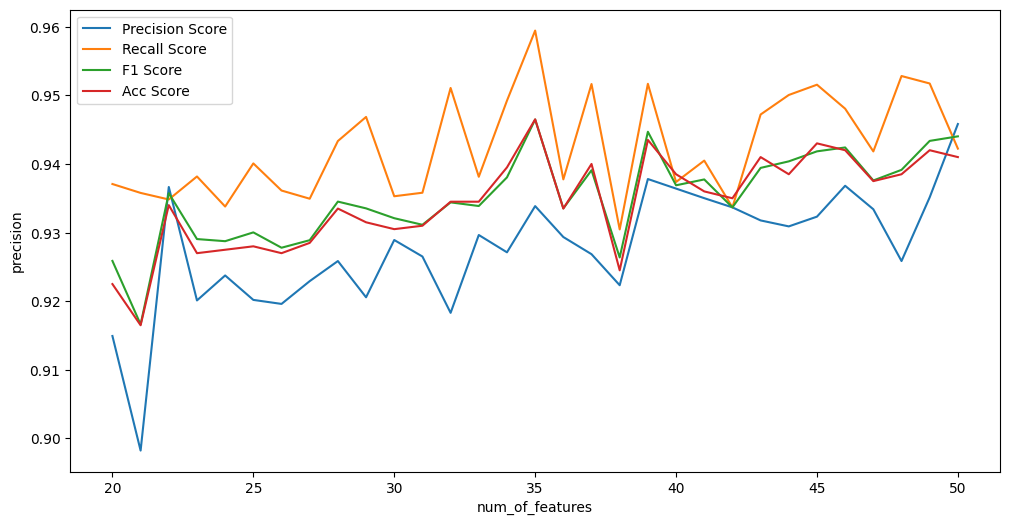

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=dataframe, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=dataframe, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=dataframe, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=dataframe, label='Acc Score')

# Training Random Forest Classifier on GPU

The only change is that Random Forest Classifier is used to train and beat the baseline provided by Logistic Regression.

In [ ]:
def train_random_forest_classifier(data, top_n):
    top_n_features = mutualinfo_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    randomforestclassifier = RandomForestClassifier(n_estimators=500,
                split_criterion=1,
                max_depth=32,
                max_leaves=-1,
                max_features=1.0,
                n_bins=128)

    randomforestclassifier.fit(X_train, y_train)

    y_prediction = randomforestclassifier.predict(X_test, predict_model='GPU')

    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    f1 = f1_score(y_test, y_prediction)
    accuracy = accuracy_score(y_test, y_prediction)

    return precision, recall, f1, accuracy

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_random_forest_classifier(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 20 features is precision : 0.9700722394220846, recall : 0.9863588667366212, f1 score : 0.9781477627471384, accuracy : 0.979


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 21 features is precision : 0.979296066252588, recall : 0.9752577319587629, f1 score : 0.9772727272727273, accuracy : 0.978


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 22 features is precision : 0.9702970297029703, recall : 0.9819639278557114, f1 score : 0.9760956175298805, accuracy : 0.976


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 23 features is precision : 0.984390243902439, recall : 0.9758220502901354, f1 score : 0.9800874210781932, accuracy : 0.9795


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 24 features is precision : 0.9850448654037887, recall : 0.9782178217821782, f1 score : 0.9816194734227521, accuracy : 0.9815


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 25 features is precision : 0.9838872104733132, recall : 0.9809236947791165, f1 score : 0.9824032176973353, accuracy : 0.9825


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 26 features is precision : 0.9698795180722891, recall : 0.9747729566094854, f1 score : 0.9723200805234021, accuracy : 0.9725


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 27 features is precision : 0.977710233029382, recall : 0.9737638748738647, f1 score : 0.9757330637007078, accuracy : 0.976


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 28 features is precision : 0.982089552238806, recall : 0.982089552238806, f1 score : 0.982089552238806, accuracy : 0.982
Performance for RFC Model with Top 29 features is precision : 0.9783037475345168, recall : 0.9860834990059643, f1 score : 0.9821782178217822, accuracy : 0.982


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 30 features is precision : 0.9851632047477745, recall : 0.9755142017629774, f1 score : 0.9803149606299213, accuracy : 0.98


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 31 features is precision : 0.9789069990412272, recall : 0.9760994263862333, f1 score : 0.977501196744854, accuracy : 0.9765


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 32 features is precision : 0.969758064516129, recall : 0.982635342185904, f1 score : 0.976154236428209, accuracy : 0.9765


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 33 features is precision : 0.9777777777777777, recall : 0.9787664307381193, f1 score : 0.9782718544719555, accuracy : 0.9785


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 34 features is precision : 0.975071907957814, recall : 0.9797687861271677, f1 score : 0.9774147044690052, accuracy : 0.9765
Performance for RFC Model with Top 35 features is precision : 0.9801192842942346, recall : 0.985014985014985, f1 score : 0.9825610363726955, accuracy : 0.9825


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 36 features is precision : 0.971875, recall : 0.9769633507853404, f1 score : 0.9744125326370757, accuracy : 0.9755
Performance for RFC Model with Top 37 features is precision : 0.9838249286393911, recall : 0.9894736842105263, f1 score : 0.9866412213740458, accuracy : 0.986


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 38 features is precision : 0.9736008447729673, recall : 0.9808510638297873, f1 score : 0.9772125066242713, accuracy : 0.9785


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 39 features is precision : 0.9772502472799208, recall : 0.9840637450199203, f1 score : 0.9806451612903225, accuracy : 0.9805


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 40 features is precision : 0.9819819819819819, recall : 0.98001998001998, f1 score : 0.981, accuracy : 0.981


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 41 features is precision : 0.9817997977755308, recall : 0.9817997977755308, f1 score : 0.9817997977755308, accuracy : 0.982


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 42 features is precision : 0.9751809720785936, recall : 0.9761904761904762, f1 score : 0.9756854630108639, accuracy : 0.9765


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 43 features is precision : 0.9782823297137216, recall : 0.9782823297137216, f1 score : 0.9782823297137216, accuracy : 0.978


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 44 features is precision : 0.9774509803921568, recall : 0.9822660098522168, f1 score : 0.9798525798525799, accuracy : 0.9795


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 45 features is precision : 0.9812252964426877, recall : 0.9783251231527094, f1 score : 0.9797730636408486, accuracy : 0.9795


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 46 features is precision : 0.9835589941972921, recall : 0.9864209505334627, f1 score : 0.9849878934624697, accuracy : 0.9845


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 47 features is precision : 0.9755142017629774, recall : 0.9774288518155054, f1 score : 0.9764705882352941, accuracy : 0.976


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 48 features is precision : 0.9822134387351779, recall : 0.981243830207305, f1 score : 0.9817283950617284, accuracy : 0.9815


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 49 features is precision : 0.9663608562691132, recall : 0.973305954825462, f1 score : 0.9698209718670077, accuracy : 0.9705


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 50 features is precision : 0.9848790322580645, recall : 0.9878665318503539, f1 score : 0.9863705199394245, accuracy : 0.9865


In [ ]:
dataframe = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
dataframe.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.970072,0.986359,0.978148,0.9790
1,21,0.979296,0.975258,0.977273,0.9780
2,22,0.970297,0.981964,0.976096,0.9760
3,23,0.984390,0.975822,0.980087,0.9795
4,24,0.985045,0.978218,0.981619,0.9815


In [ ]:
# Sort by descending order of accuracy
df = dataframe.sort_values(by='accuracy', ascending=False)
df.head()

,num_of_features,precision,recall,f1_score,accuracy
30,50,0.984879,0.987867,0.986371,0.9865
17,37,0.983825,0.989474,0.986641,0.9860
26,46,0.983559,0.986421,0.984988,0.9845
5,25,0.983887,0.980924,0.982403,0.9825
15,35,0.980119,0.985015,0.982561,0.9825


# Visualize Random Forest Performance

The goal is to beat Logistic Regression Baseline which is

* accuracy = 0.9435
* precision = 0.937804
* recall = 0.951677
* f1_score = 0.944689

So by visualizing the figure below, the conclusion is that the best number of features for this model would be 50.

<Axes: xlabel='num_of_features', ylabel='precision'>

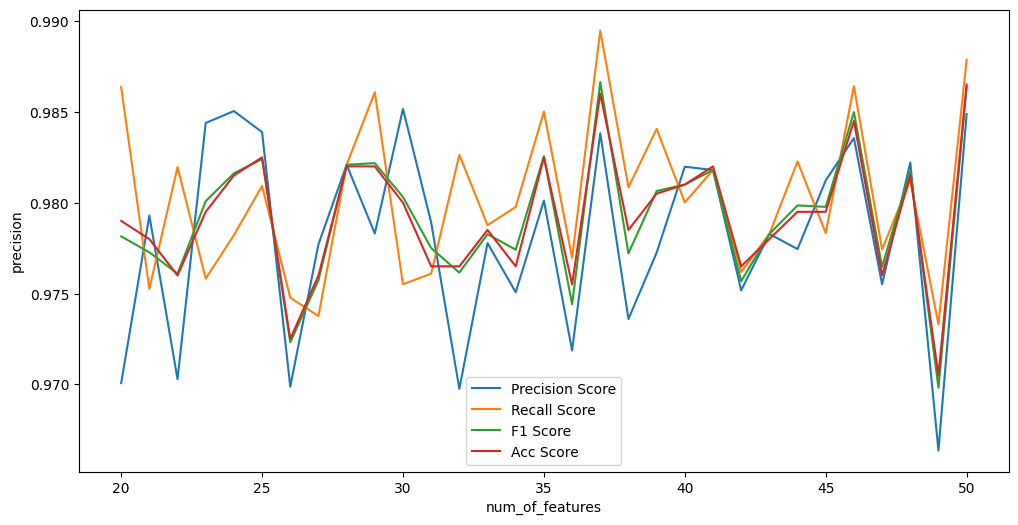

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=dataframe, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=dataframe, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=dataframe, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=dataframe, label='Acc Score')

# Final Random Forest Model

Training the final Random Forest Model based on the optimal number of features

In [ ]:
top_n_features = mutualinfo_scores.sort_values(ascending=False).head(50).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

randomforestclassifier = RandomForestClassifier(n_estimators=500,
            split_criterion=1,
            max_depth=32,
            max_leaves=-1,
            max_features=1.0,
            n_bins=128)

randomforestclassifier.fit(X_train, y_train)

y_prediction = randomforestclassifier.predict(X_test, predict_model='GPU')

precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(50, precision, recall, f1, accuracy))

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Performance for RFC Model with Top 37 features is precision : 0.9762845849802372, recall : 0.979187314172448, f1 score : 0.9777337951509154, accuracy : 0.9775


# Performance

The model is now capable of predicting at up to 98% accuracy, precision and recall. This also shows that the model has high confidence in predicting phishing or non-phishing site

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       991
           1       0.98      0.98      0.98      1009

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

